<a href="https://colab.research.google.com/github/raiutarii/UTS-Mechine-Learning/blob/main/UTS_Machine_Learning_Rai_Barokah_Utari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import tree
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import shuffle
import pydotplus



#Load the Data

In [ ]:
#Load the Breast Cancer dataset
breast_cancer = datasets.load_breast_cancer()
df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
df['target'] = breast_cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

# Visualize Data Trends Using Seaborn

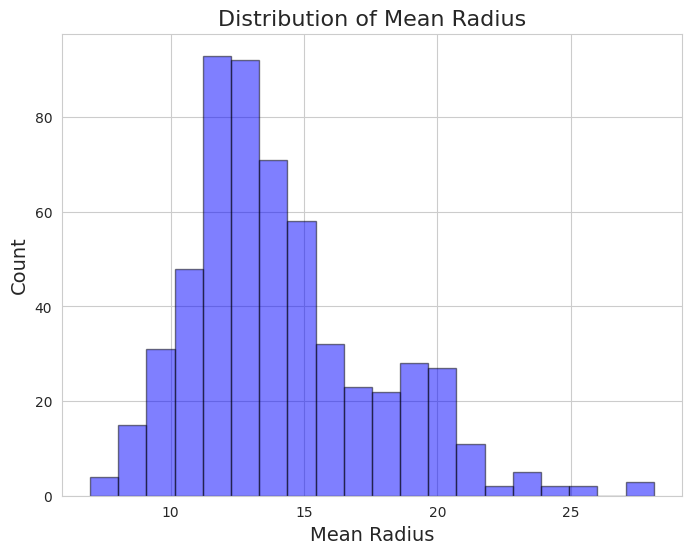

In [43]:
#Visualize Data With Histogram
import matplotlib.pyplot as plt

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(breast_cancer['data'][:,0], bins=20, alpha=0.5, color='blue', edgecolor='black')
plt.title('Distribution of Mean Radius', fontsize=16)
plt.xlabel('Mean Radius', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


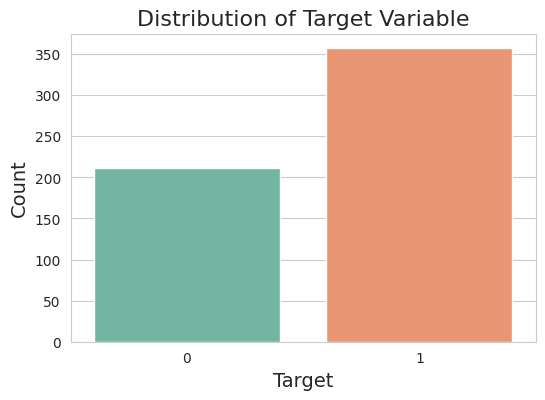

In [44]:
#Visualize the distribution of the target variable
sns.set_style('whitegrid')
plt.figure(figsize=(6, 4))
sns.countplot(x=breast_cancer['target'], palette='Set2')
plt.title('Distribution of Target Variable', fontsize=16)
plt.xlabel('Target', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


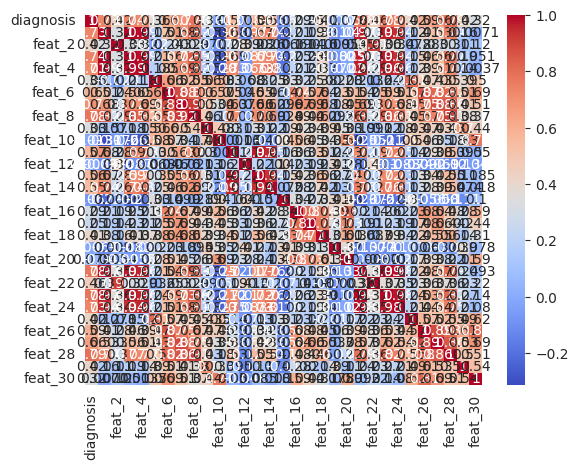

In [12]:
#Visualize the correlation between the features
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load the dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/'
                 'breast-cancer-wisconsin/wdbc.data', header=None)

# drop the first column (ID)
df.drop(0, axis=1, inplace=True)

# assign column names
col_names = ['diagnosis'] + ['feat_' + str(i) for i in range(1, 31)]
df.columns = col_names

# convert diagnosis column to binary
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# calculate correlation matrix
corr_matrix = df.corr()

# plot heatmap using seaborn
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# show the plot
plt.show()


# Explore the Data Using Decision Tree

<ipython-input-14-281d9585c043>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


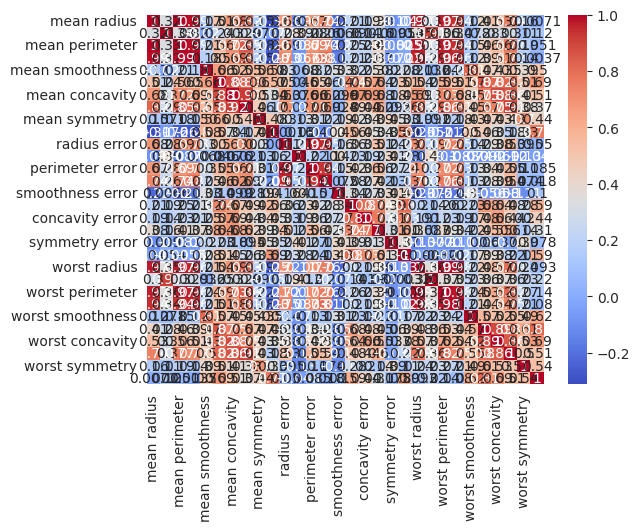

In [14]:

X, y = load_breast_cancer(return_X_y=True)
col_names = load_breast_cancer()['feature_names']
df = pd.DataFrame(X, columns=col_names)
df['diagnosis'] = y
df['diagnosis'] = df['diagnosis'].map({1: 'M', 0: 'B'})
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()



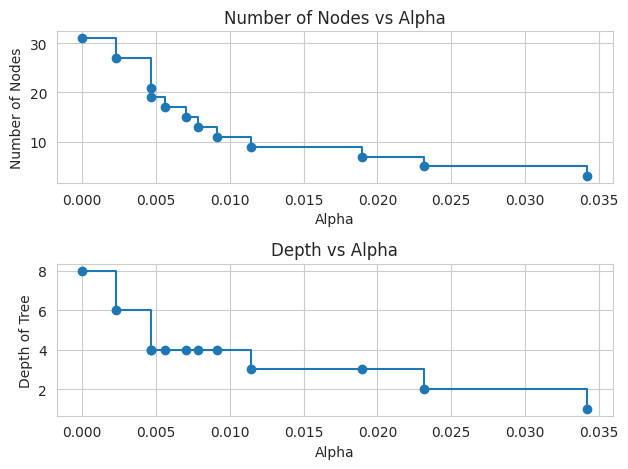

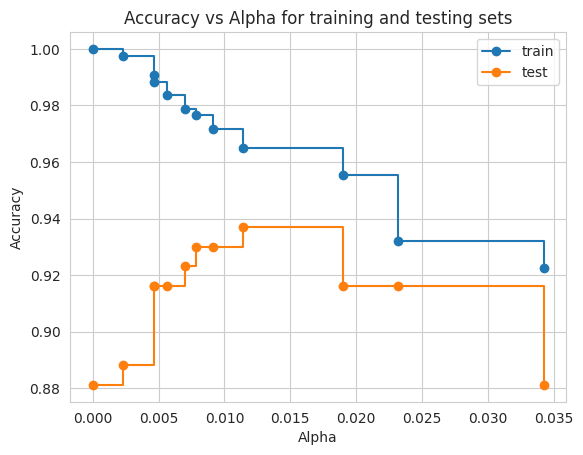

In [18]:
#Plot of accuracy versus alpha for training and testing sets of a decision tree classifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("Alpha")
ax[0].set_ylabel("Number of Nodes")
ax[0].set_title("Number of Nodes vs Alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("Alpha")
ax[1].set_ylabel("Depth of Tree")
ax[1].set_title("Depth vs Alpha")
fig.tight_layout()

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs Alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()


#  Explore the Data Using Random Forest

In [33]:

# Load the dataset
breast_cancer = load_breast_cancer()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.3, random_state=42)

# Initialize Random Forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rfc.fit(X_train, y_train)

# Predictions on the testing data
y_pred = rfc.predict(X_test)

# Evaluate the accuracy of the classifier on the testing data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.3f}%".format(accuracy * 100))


Accuracy: 97.076%


#Explore the Data Using Self-Training

In [37]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.3, random_state=42)

#Initialize a Random Forest classifier for self-training
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

#Initialize a self-training classifier
self_training = SelfTrainingClassifier(rfc, threshold=0.9, max_iter=100)

#Fit the self-training classifier on the training data
self_training.fit(X_train, y_train)

#Make predictions on the testing data
y_pred = self_training.predict(X_test)

#Evaluate the accuracy of the classifier on the testing data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.3f}%".format(accuracy * 100))

Accuracy: 97.076%


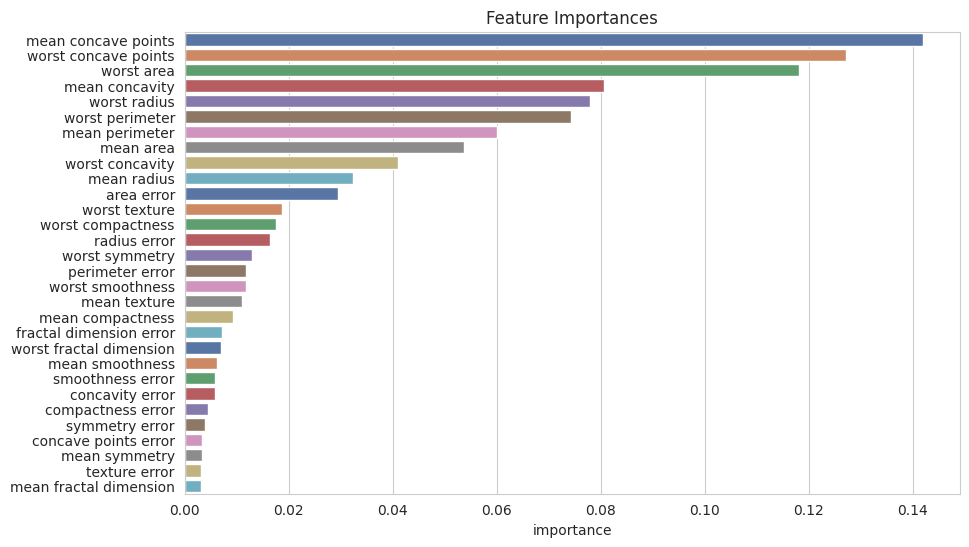

In [45]:
#Plot feature importances using Seaborn
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

#Load the dataset
breast_cancer = load_breast_cancer()

#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.3, random_state=42)

#Initialize Random Forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

#Train the classifier on the training data
rfc.fit(X_train, y_train)

#Plot feature importances using Seaborn
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]
feature_importances = pd.DataFrame(importances[indices], index=breast_cancer.feature_names[indices], columns=['importance'])
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y=feature_importances.index, data=feature_importances, palette="deep")
plt.title("Feature Importances")
plt.show()


**Explore the Data Using Self-Training**

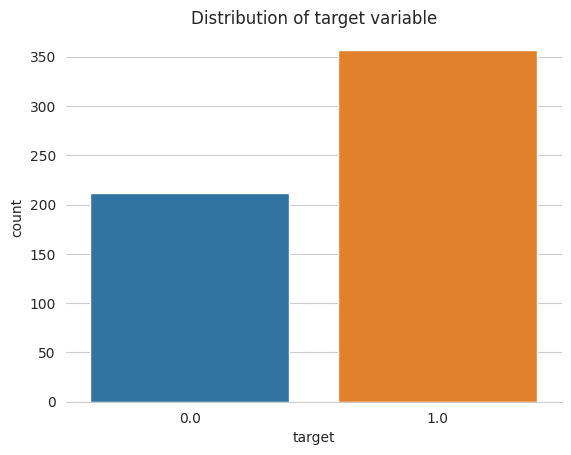

In [48]:
# Load breast cancer dataset
breast_cancer = load_breast_cancer()
# Convert the data to a Pandas DataFrame
df = pd.DataFrame(np.c_[breast_cancer['data'], breast_cancer['target']], columns = np.append(breast_cancer['feature_names'], ['target']))
# Plot the distribution of the target variable using Seaborn
sns.countplot(data=df, x='target')
sns.set_style('whitegrid')
sns.despine(left=True)
plt.title('Distribution of target variable')
plt.show()
